In [16]:
#Importerer pakker
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import webbrowser
from folium.features import DivIcon
from html2image import Html2Image
import os
from PIL import Image
import glob

# Leser av Excel-fil som er lastet ned fra NGU Granada:
df = pd.read_excel("GrunnvannsBorehull.xlsx", sheet_name="EnergiBrønn",usecols='E,F,G,J,X,Y')

# Gjør om datoer i excel-fil til ønsket datetime-format:
df = df.sort_values('boreDato')
datokolonne = 2
datoer = df.iloc[:,datokolonne]
pd.to_datetime(datoer)
pd.to_datetime(df.iloc[:,datokolonne])

35099   1900-01-01
28004   1900-01-01
24489   1900-01-01
5095    1900-01-01
23840   1900-01-01
           ...    
36713          NaT
38215          NaT
39069          NaT
41600          NaT
50360          NaT
Name: boreDato, Length: 54730, dtype: datetime64[ns]

In [17]:
#Skiller ut de 10 største oppdragstakerne:
baasum = df[df['oppdragstaker'].str.contains('|'.join(['Båsum Boring A.S','Båsum Boring Trøndelag AS']))] 
rototec = df[df['oppdragstaker'].str.contains('|'.join(['ROTOTEC AS','Rototec AS']))]
kraftenergibronn = df[df['oppdragstaker'].str.contains('Kraft Energi og brønnboring AS')]
aarsleff = df[df['oppdragstaker'].str.contains('|'.join(['Sør-Norsk Brønnboring AS','SØR-NORSK BORING AS']))]
seabrokers = df[df['oppdragstaker'].str.contains('|'.join(['Østlandet brønn- og energiboring as','ØSTLANDET BRØNN OG ENERGIBORING AS','Østlandske brønn og energiboring AS',
                                                           'Østlandske brønnboring a/s','SEABROKERS GEOENERGI AS','Seabrokers Entreprenør Service as','Seabrokers Fundamentering AS']))]
vestnorsk = df[df['oppdragstaker'].str.contains('Vestnorsk Brunnboring As')]
universal = df[df['oppdragstaker'].str.contains('|'.join(['UNIVERSAL BRØNNBORING AS', 'Universal Brønnboring A/S']))]
follo = df[df['oppdragstaker'].str.contains('Follo brønnboring AS')]
vaeraas = df[df['oppdragstaker'].str.contains('Værås Brønnboring')]
brodrenemyhre = df[df['oppdragstaker'].str.contains('Brødrene Myhre A/S')]

enkelthusholdning = df[df['brønnBrukOmfang'].str.contains('Enkelthusholdning')]
storre_anlegg = df[df['brønnBrukOmfang'].str.contains('Større anlegg')]
andre_anlegg = df[df['brønnBrukOmfang'].str.contains('|'.join(['Gårdsbruk', 'Hytte/fritidsbolig', 'Turistnæring', 'Ukjent']))]

# Skriver ut totalt antall brønner for de 10 største oppdragstakerne:
print(len(df))                          #1992-2023 (alle)
print(len(baasum))                      #1996-2023
print(len(rototec))                     #2012-2023
print(len(kraftenergibronn))            #2005-2023
print(len(aarsleff))                    #2002-2023
print(len(seabrokers))                  #1996-2023
print(len(vestnorsk))                   #1997-2023
print(len(universal))                   #1996-2019
print(len(follo))                       #2001-2023
print(len(vaeraas))                     #1992-2023
print(len(brodrenemyhre))               #1993-2023

#Bruk denne til å finne oppdragstakerens første og siste år:
#print(brodrenemyre.sort_values('boreDato')[0:-1])

54730
11773
4591
2561
2513
2667
1945
1734
1662
1438
1381


In [18]:
def bronner_hvert_aar_borer(borer,aar):
    #input:     borer:  Datasett med boredata for valgt oppdragstaker, bruk df for alle oppdragstakere
    #           aar:    Året hvor man vil telle opp antall brønner i
    #output:            Datasett med boredata for valgt oppdragstaker og valgt år

    borer = borer.sort_values('boreDato')
    datoer_borer = borer.iloc[:,datokolonne]
    datoer_aar = [date for date in borer.iloc[:,datokolonne] if date.year == aar]
    indeks_aar = []
    for i in range(0,len(datoer_aar)):
        hvor = np.where(datoer_borer == np.datetime64(datoer_aar[i]))
        indeks_aar = np.concatenate((indeks_aar,hvor[0]))
    if len(indeks_aar) >=1:
        bronner_aar_borer = borer.iloc[int(indeks_aar[0]):int(indeks_aar[-1])+1,:]
    else:
        bronner_aar_borer = pd.DataFrame()
    return bronner_aar_borer

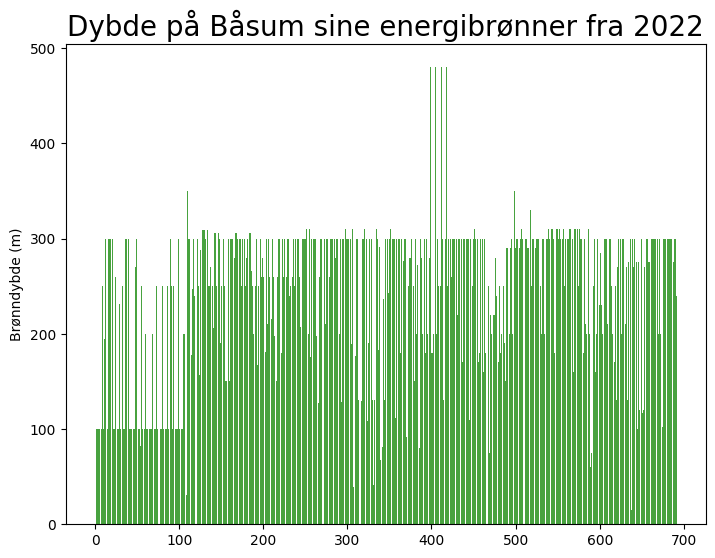

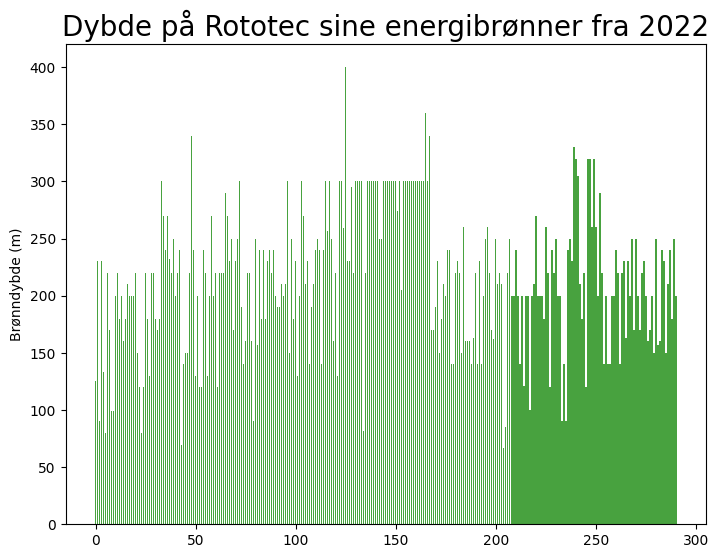

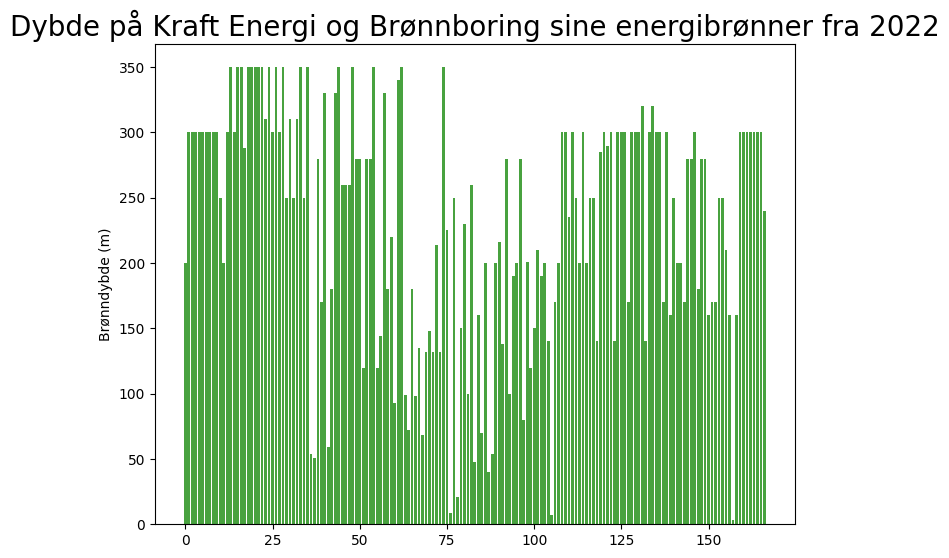

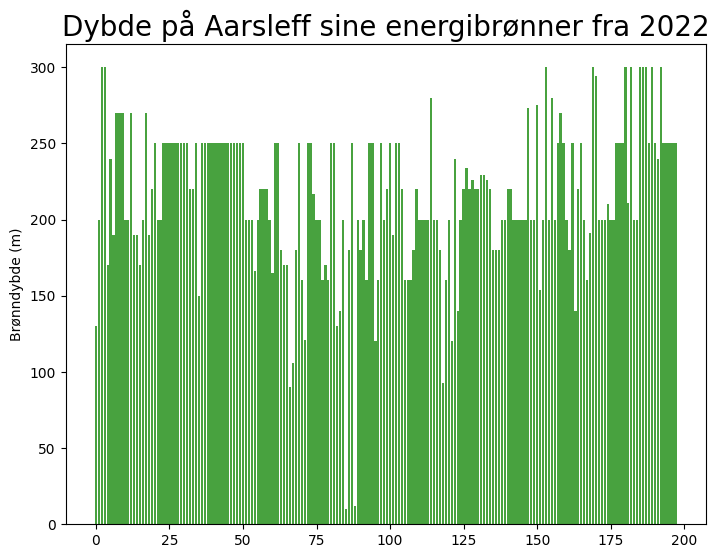

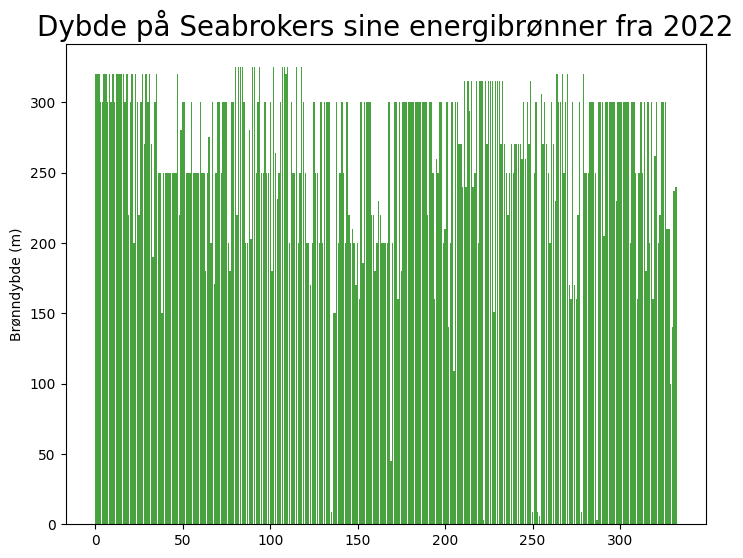

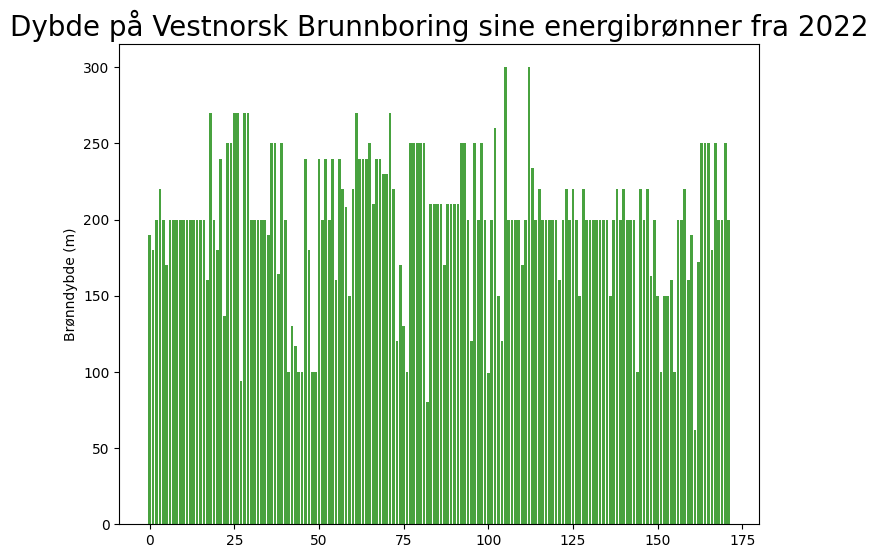

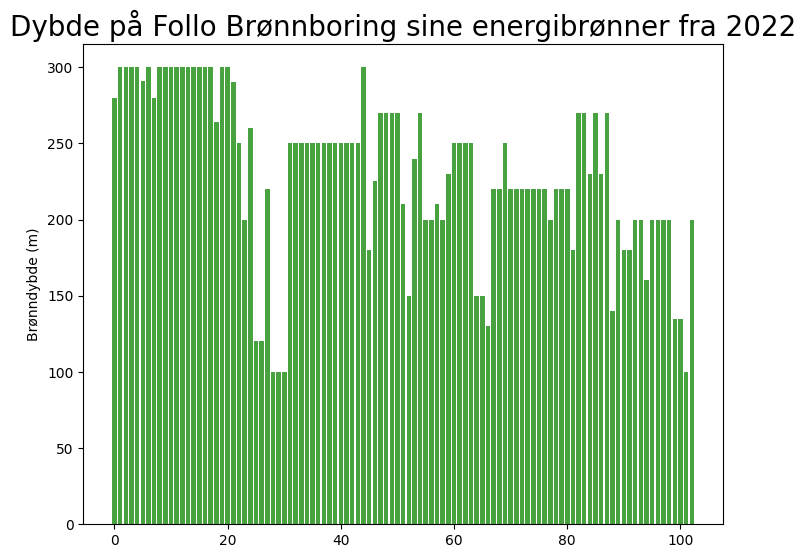

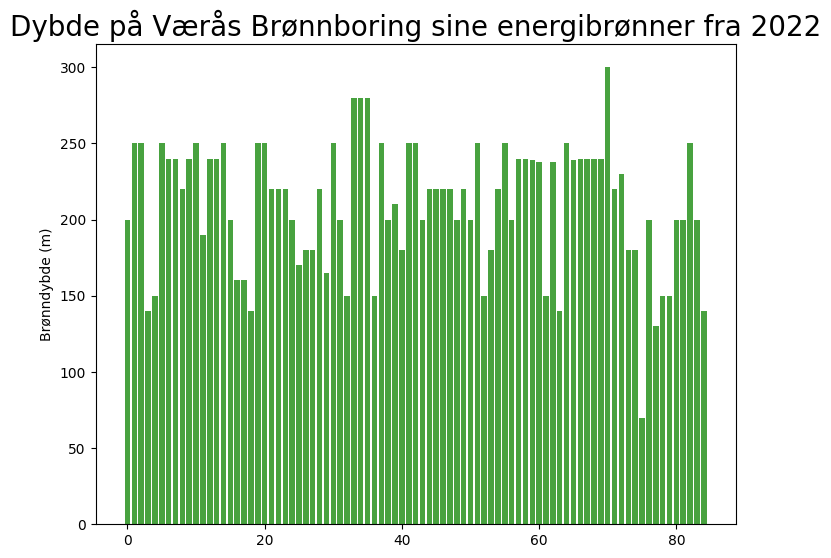

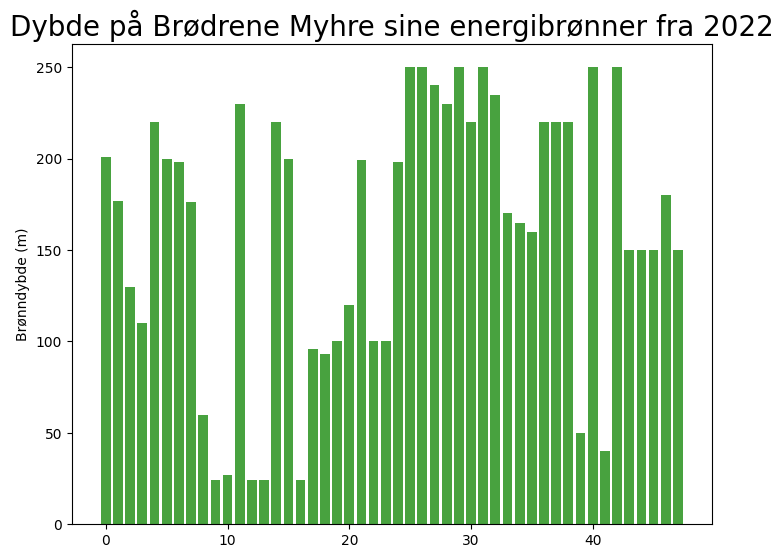

In [19]:
ni_storste_str = ['Båsum', 'Rototec', 'Kraft Energi og Brønnboring', 'Aarsleff', 'Seabrokers', 'Vestnorsk Brunnboring', 'Follo Brønnboring', 'Værås Brønnboring', 'Brødrene Myhre']
ni_storste = [baasum,rototec,kraftenergibronn,aarsleff,seabrokers,vestnorsk,follo,vaeraas,brodrenemyhre]

#   f"Kart_GIF_Folium_{navn}"


for i in range(0,9):
    siste_aar = bronner_hvert_aar_borer(ni_storste[i],2022)
    dybde = np.array(siste_aar['boretLengde'])
    dybde[dybde > 0]

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_title(f'Dybde på {ni_storste_str[i]} sine energibrønner fra 2022',fontsize = 20)
    ax.set_ylabel('Brønndybde (m)')
    x_akse =  np.arange(0,len(dybde))
    ax.bar(x_akse,dybde,color='#48a23f')
    plt.savefig(f"Bronndybde-diagrammer/{ni_storste_str[i]}_dybder.png", dpi=300, bbox_inches='tight')
    plt.show()
